In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('timesData.csv')
df.head(10)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011
5,6,University of Cambridge,United Kingdom,90.5,77.7,94.1,94.0,57.0,91.2,"18,812",11.8,34%,46 : 54,2011
6,6,University of Oxford,United Kingdom,88.2,77.2,93.9,95.1,73.5,91.2,"19,919",11.6,34%,46 : 54,2011
7,8,"University of California, Berkeley",United States of America,84.2,39.6,99.3,97.8,-,91.1,"36,186",16.4,15%,50 : 50,2011
8,9,Imperial College London,United Kingdom,89.2,90.0,94.5,88.3,92.9,90.6,"15,060",11.7,51%,37 : 63,2011
9,10,Yale University,United States of America,92.1,59.2,89.7,91.5,-,89.5,"11,751",4.4,20%,50 : 50,2011


In [3]:
df[df['country']=='Belarus']

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
2422,601-800,Belarusian State University,Belarus,20.2,48.2,8.7,6.0,28.0,-,"29,303",10.6,6%,69 : 31,2016


In [4]:
df.isnull().sum()

world_rank                  0
university_name             0
country                     0
teaching                    0
international               0
research                    0
citations                   0
income                      0
total_score                 0
num_students               59
student_staff_ratio        59
international_students     67
female_male_ratio         233
year                        0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2603 non-null   object 
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2603 non-null   object 
 8   total_score             2603 non-null   object 
 9   num_students            2544 non-null   object 
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   object 
 12  female_male_ratio       2370 non-null   object 
 13  year                    2603 non-null   int64  
dtypes: float64(4), int64(1), object(9)
memor

### Чистка данных и избавление от нулей

In [6]:
df['student_staff_ratio'].fillna(df['student_staff_ratio'].mean(), inplace = True)

df['num_students'] = df['num_students'].str.replace(',', '')
df['num_students'] = pd.to_numeric(df['num_students'], errors='coerce')
df['num_students'].fillna(df['num_students'].mean(), inplace = True)

df['international_students'] = df['international_students'].str.replace('%', '')
df['international_students'].fillna(df['international_students'].median(), inplace = True)

In [7]:
df[['count_female','count_male']] = df['female_male_ratio'].str.split(':', expand=True)

df['count_female'] = pd.to_numeric(df['count_female'], errors='coerce')
df['count_male'] = pd.to_numeric(df['count_male'], errors='coerce')


df['count_male'].fillna(df['count_male'].mean(), inplace = True)
df['count_female'].fillna(df['count_female'].mean(), inplace = True)

In [8]:
df.isnull().sum()

world_rank                  0
university_name             0
country                     0
teaching                    0
international               0
research                    0
citations                   0
income                      0
total_score                 0
num_students                0
student_staff_ratio         0
international_students      0
female_male_ratio         233
year                        0
count_female                0
count_male                  0
dtype: int64

In [9]:
df.head(10)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year,count_female,count_male
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,20152.0,8.9,25,NaN,2011,49.683988,50.316012
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,2243.0,6.9,27,33 : 67,2011,33.000000,67.000000
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,11074.0,9.0,33,37 : 63,2011,37.000000,63.000000
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,15596.0,7.8,22,42 : 58,2011,42.000000,58.000000
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,7929.0,8.4,27,45 : 55,2011,45.000000,55.000000
5,6,University of Cambridge,United Kingdom,90.5,77.7,94.1,94.0,57.0,91.2,18812.0,11.8,34,46 : 54,2011,46.000000,54.000000
6,6,University of Oxford,United Kingdom,88.2,77.2,93.9,95.1,73.5,91.2,19919.0,11.6,34,46 : 54,2011,46.000000,54.000000
7,8,"University of California, Berkeley",United States of America,84.2,39.6,99.3,97.8,-,91.1,36186.0,16.4,15,50 : 50,2011,50.000000,50.000000
8,9,Imperial College London,United Kingdom,89.2,90.0,94.5,88.3,92.9,90.6,15060.0,11.7,51,37 : 63,2011,37.000000,63.000000
9,10,Yale University,United States of America,92.1,59.2,89.7,91.5,-,89.5,11751.0,4.4,20,50 : 50,2011,50.000000,50.000000


C:\Users\Ксения\AppData\Local\Temp\ipykernel_30360\2298856989.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(abs(df.corr()), annot=True, cmap='coolwarm')


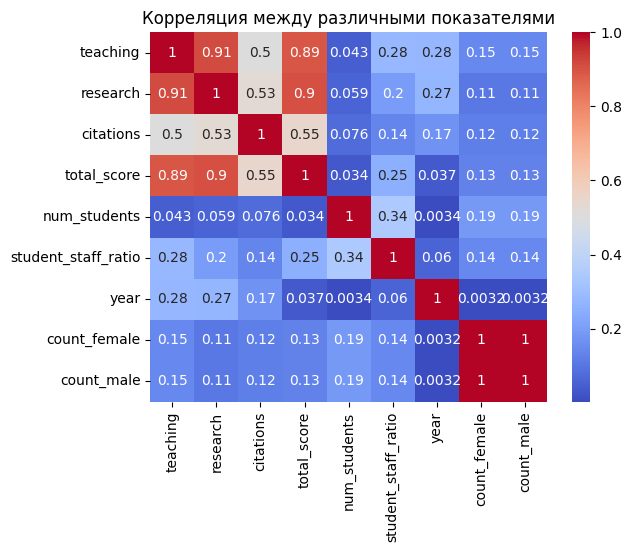

In [57]:
sns.heatmap(abs(df.corr()), annot=True, cmap='coolwarm')
plt.title('Корреляция между различными показателями')
plt.show()

### Количество студентов для топ 3 университетов за каждый год 

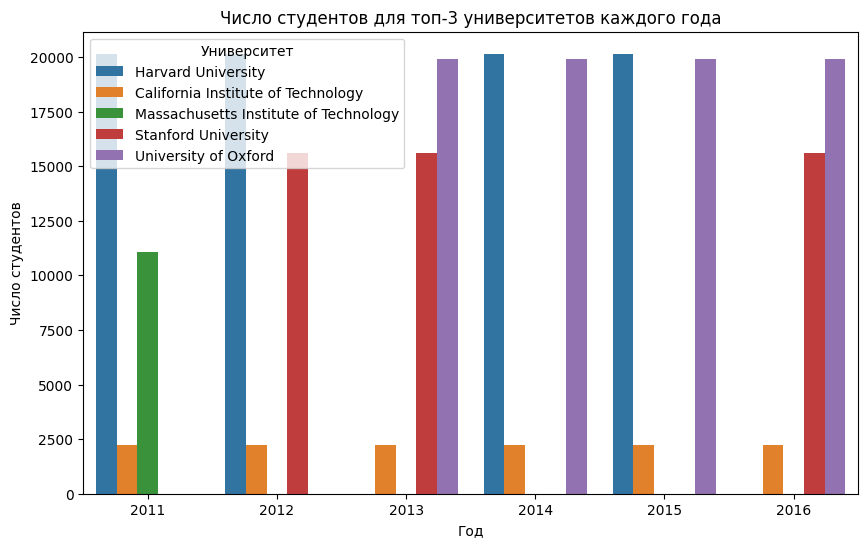

In [10]:
df2011 = df[df.year == 2011].iloc[:3,:]
df2012 = df[df.year == 2012].iloc[:3,:]
df2013 = df[df.year == 2013].iloc[:3,:]
df2014 = df[df.year == 2014].iloc[:3,:]
df2015 = df[df.year == 2015].iloc[:3,:]
df2016 = df[df.year == 2016].iloc[:3,:]

df_all_years = pd.concat([df2011, df2012, df2013, df2014, df2015, df2016])

plt.figure(figsize=(10, 6))

sns.barplot(data=df_all_years, x='year', y='num_students', hue='university_name')

plt.title('Число студентов для топ 3 университетов каждого года')
plt.xlabel('Год')
plt.ylabel('Число студентов')
plt.legend(title='Университет')
plt.show()

### Парные графики взаимосвязей для каждого кода по интересующим полям. С помощью них можно найти взаимосвязь между полями и их распределение 

<Figure size 1000x600 with 0 Axes>

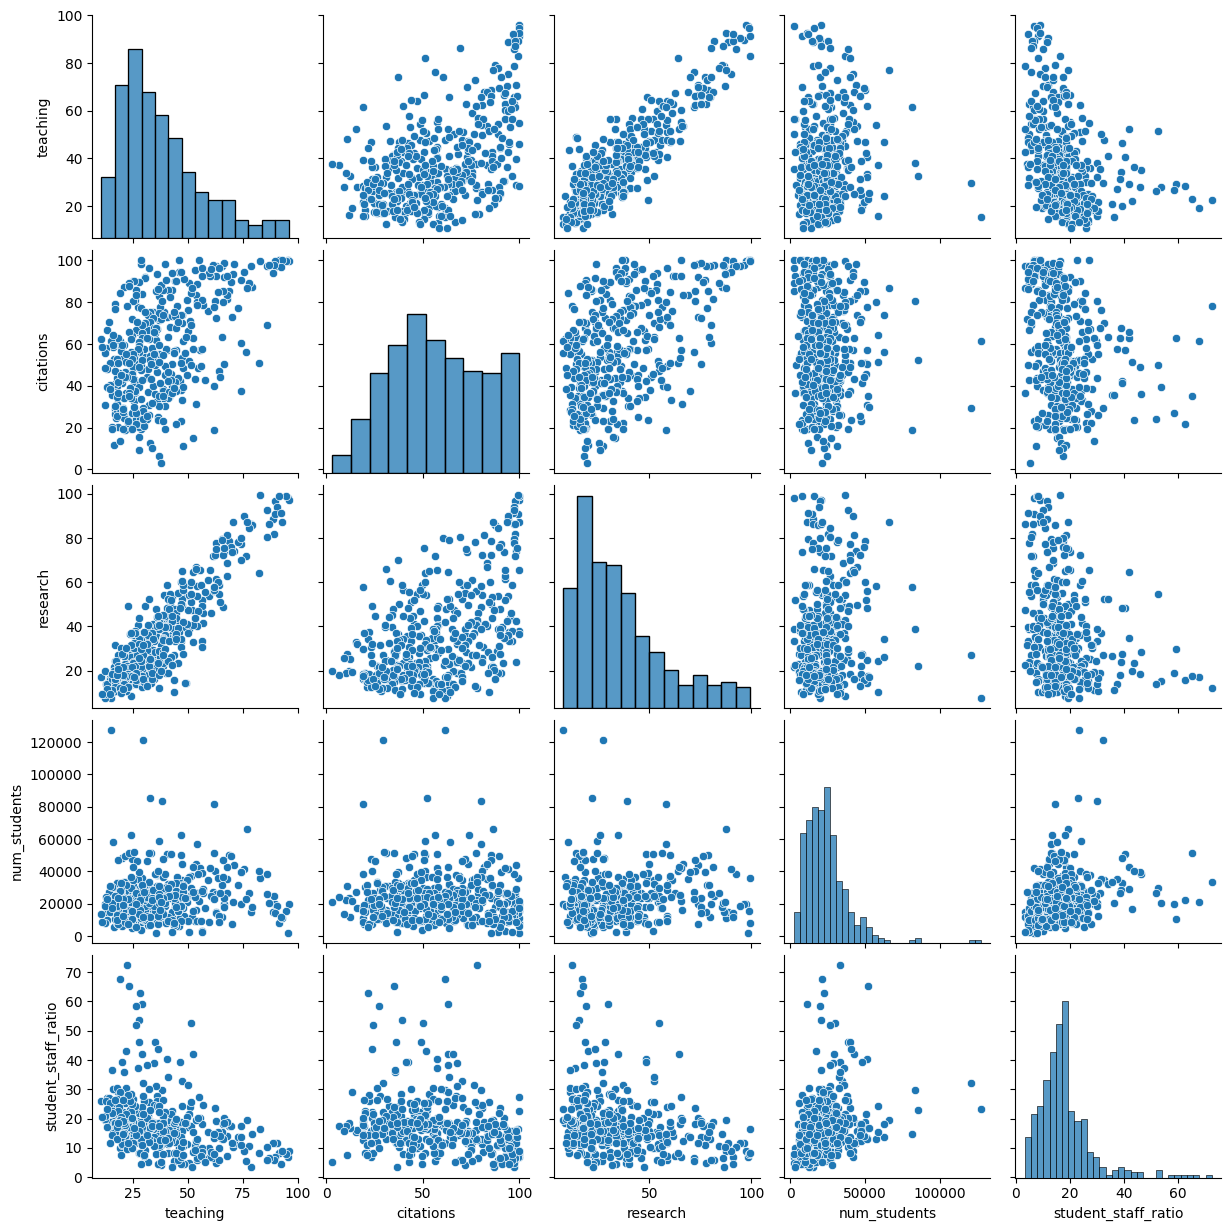

In [40]:
df2012 = df[df.year == 2012]
plt.figure(figsize=(10, 6))
sns.pairplot(data=df2012.loc[:,['teaching', 'citations', 'research', 'num_students', 'student_staff_ratio']])
plt.show()

<Figure size 1000x600 with 0 Axes>

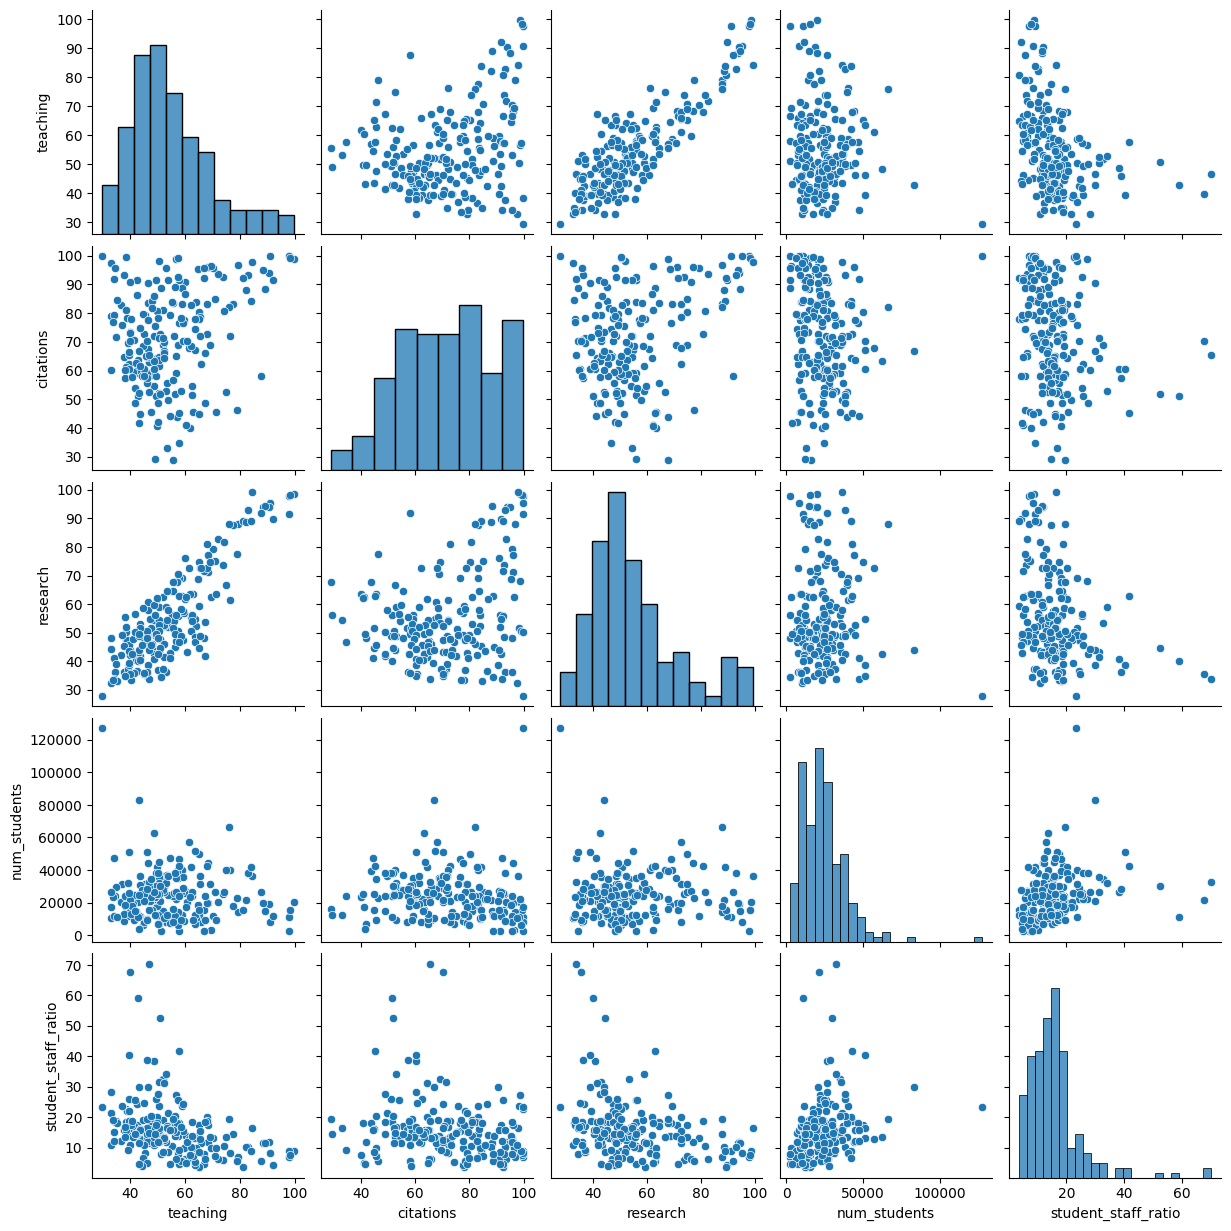

In [41]:
df2011 = df[df.year == 2011]

plt.figure(figsize=(10, 6))
sns.pairplot(data=df2011.loc[:,['teaching', 'citations', 'research', 'num_students', 'student_staff_ratio']])
plt.show()

<Figure size 1000x600 with 0 Axes>

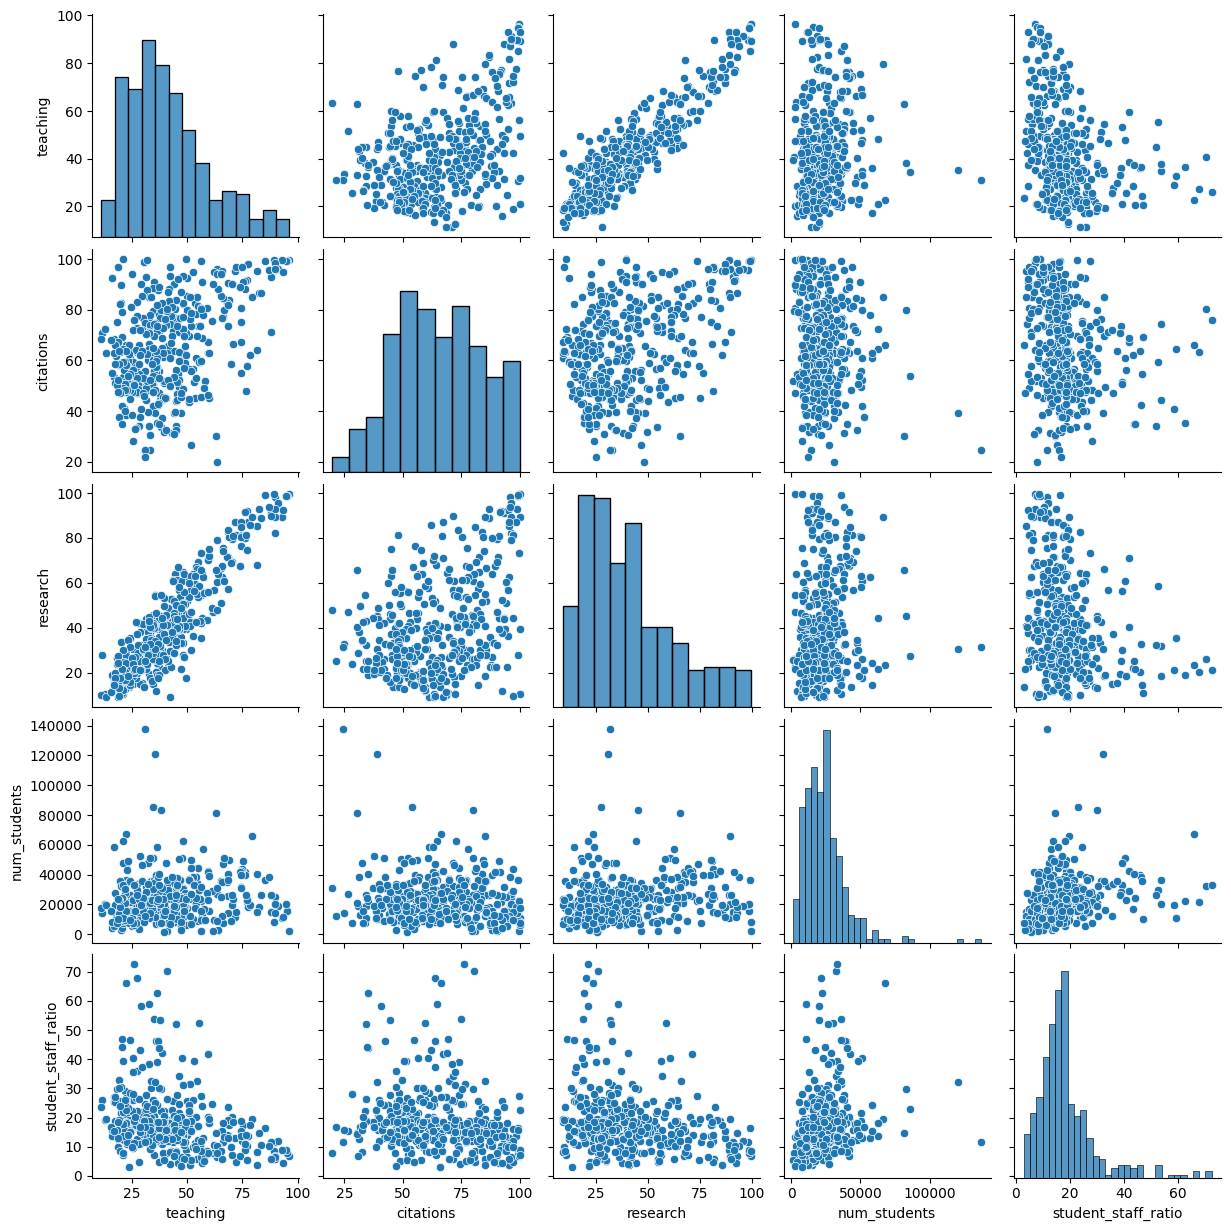

In [43]:
df2013 = df[df.year == 2013]

plt.figure(figsize=(10, 6))
sns.pairplot(data=df2013.loc[:,['teaching', 'citations', 'research', 'num_students', 'student_staff_ratio']])
plt.show()

<Figure size 1000x600 with 0 Axes>

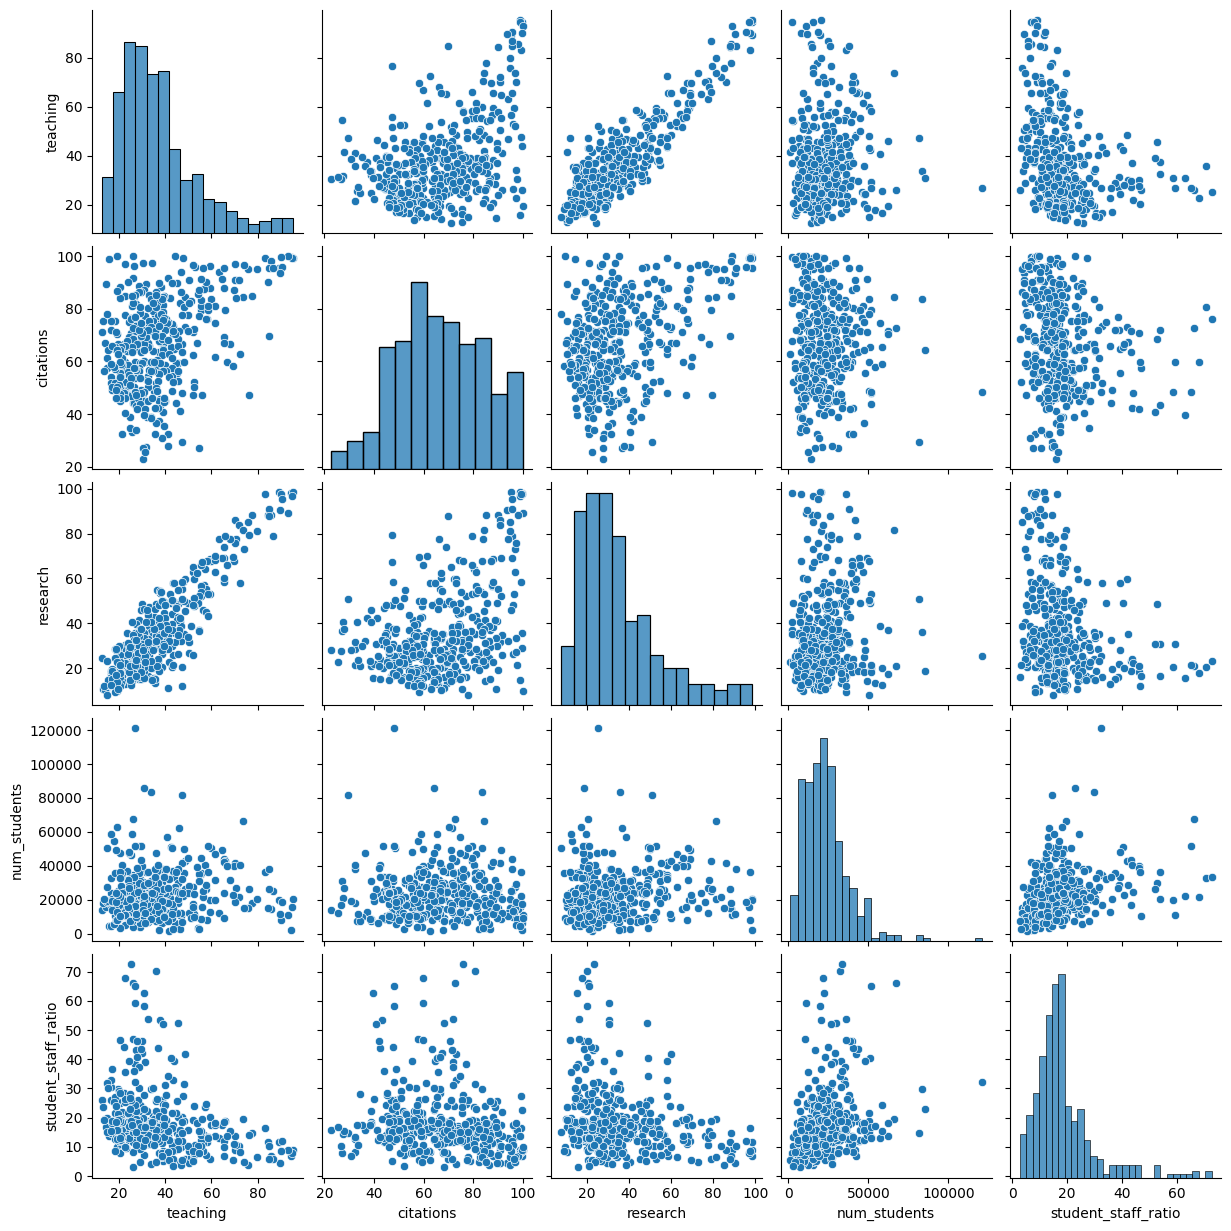

In [44]:
df2014 = df[df.year == 2014]

plt.figure(figsize=(10, 6))
sns.pairplot(data=df2014.loc[:,['teaching', 'citations', 'research', 'num_students', 'student_staff_ratio']])
plt.show()

<Figure size 1000x600 with 0 Axes>

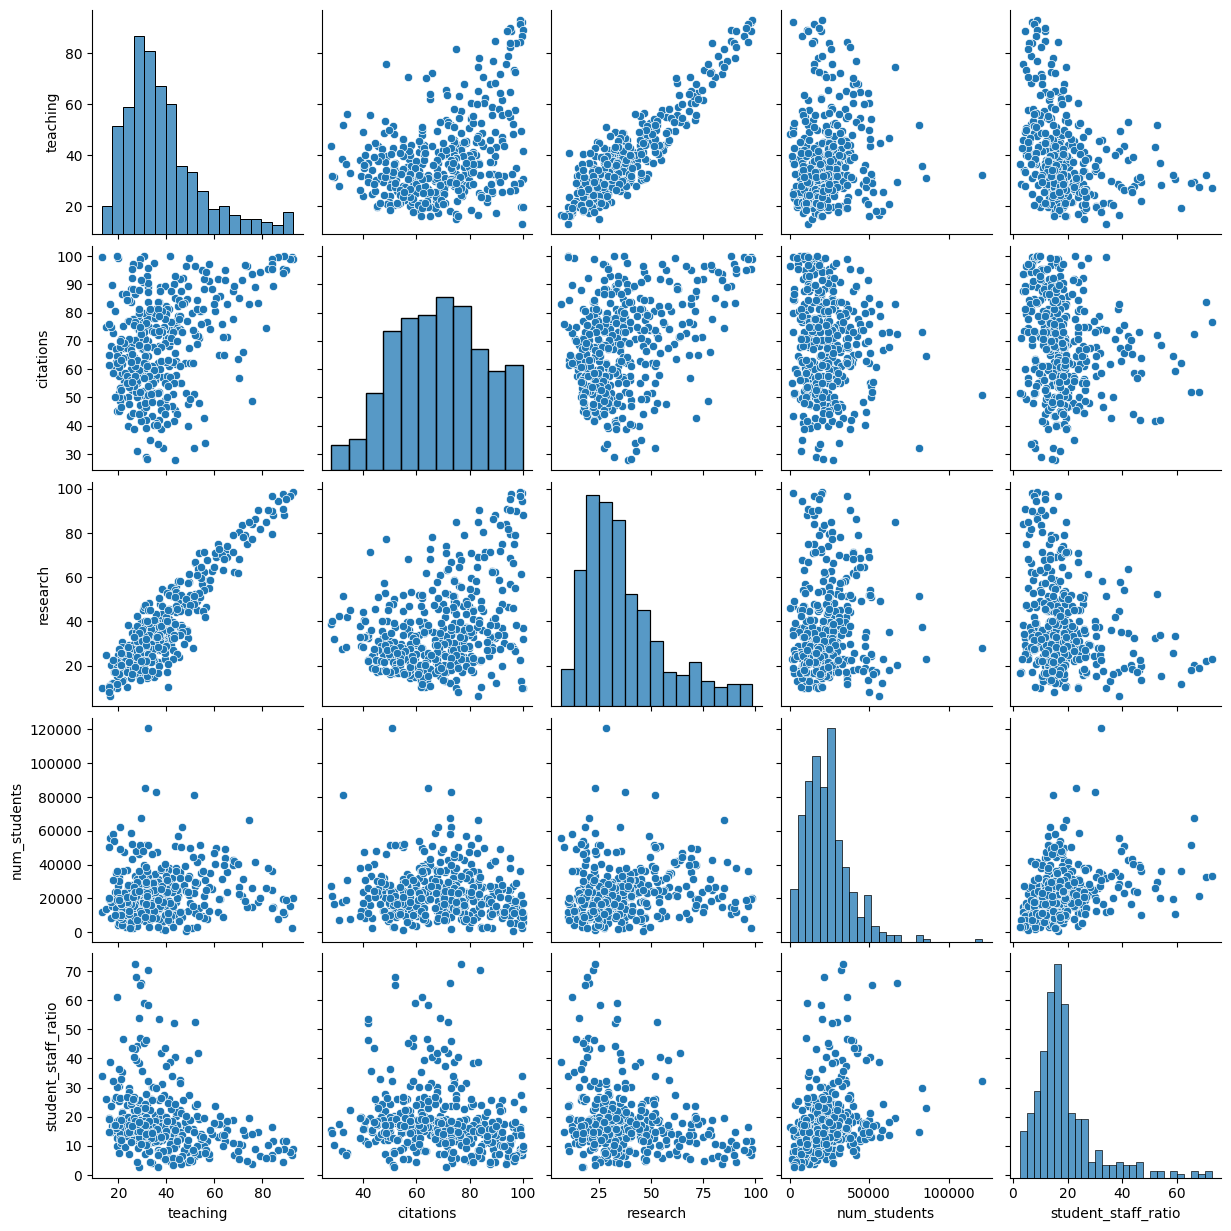

In [45]:
df2015 = df[df.year == 2015]

plt.figure(figsize=(10, 6))
sns.pairplot(data=df2015.loc[:,['teaching', 'citations', 'research', 'num_students', 'student_staff_ratio']])
plt.show()

<Figure size 1000x600 with 0 Axes>

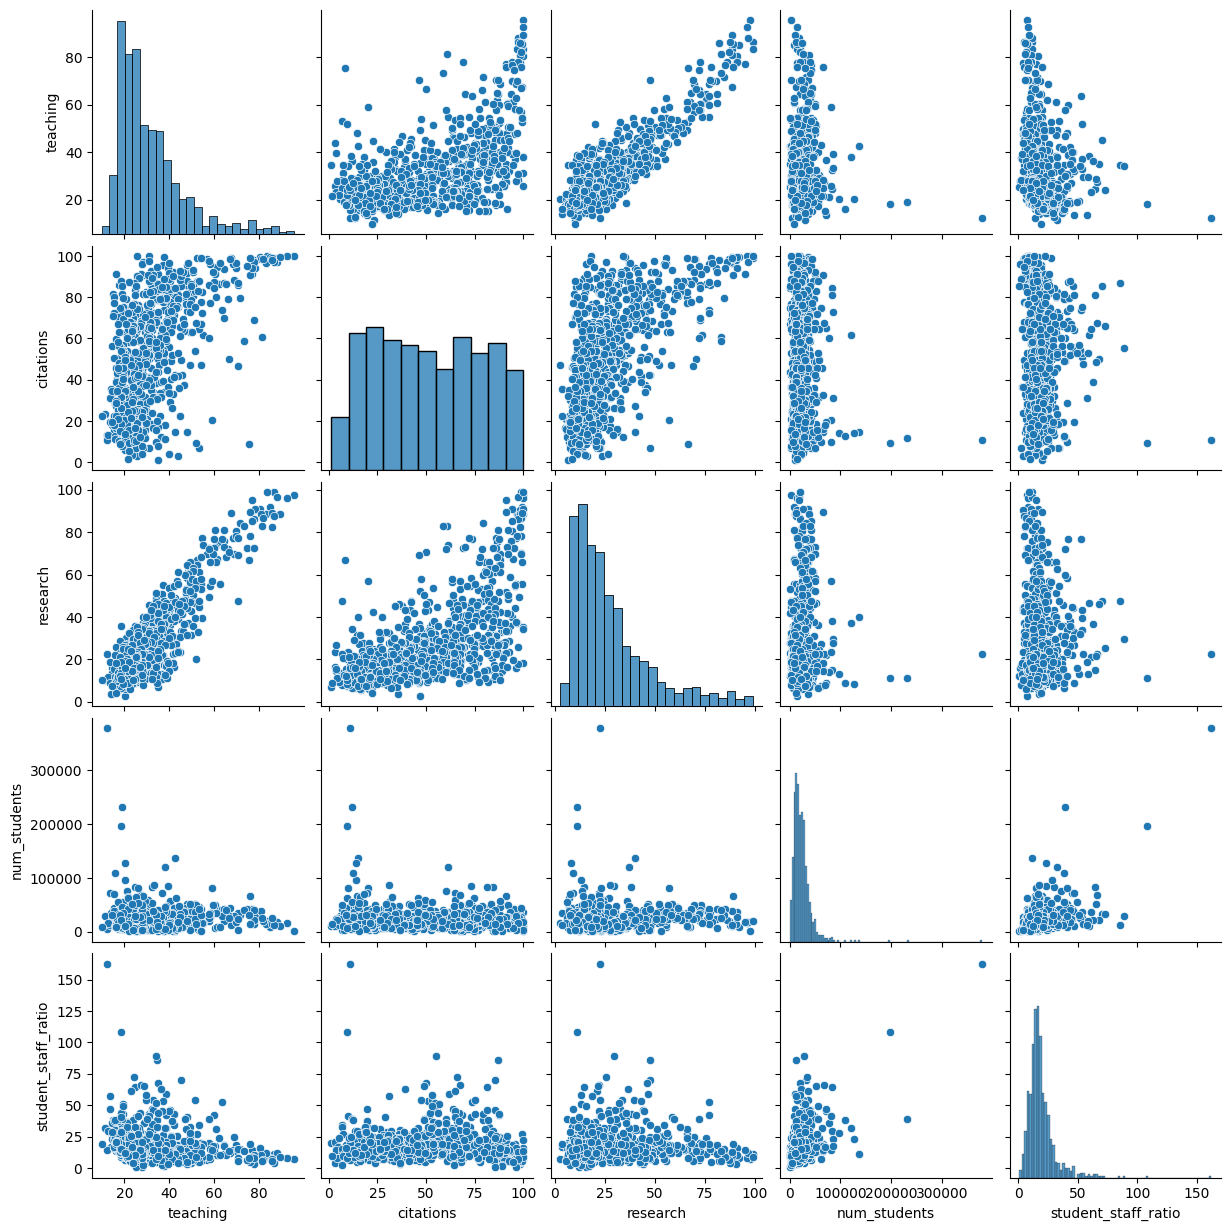

In [46]:
df2016 = df[df.year == 2016]

plt.figure(figsize=(10, 6))
sns.pairplot(data=df2016.loc[:,['teaching', 'citations', 'research', 'num_students', 'student_staff_ratio']])
plt.show()

# ВЫВОД 
## По графикам выше можно сделать вывод о 'поведении' значений в полях за разные года. Можно посмотреть как менялось распределение и в какие года распределение было близко к нормальному. 
### Например, распределение teaching и research близко к нормальному в 2015 и в 2011. 

In [12]:
df['country'].unique()

array(['United States of America', 'United Kingdom', 'Switzerland',
       'Canada', 'Hong Kong', 'Japan', 'South Korea', 'Singapore',
       'Australia', 'China', 'France', 'Sweden', 'Germany',
       'Republic of Ireland', 'Finland', 'Taiwan', 'South Africa',
       'Turkey', 'Netherlands', 'Belgium', 'Denmark', 'Norway', 'Spain',
       'New Zealand', 'Egypt', 'Austria', 'Israel', 'Brazil', 'Italy',
       'Russian Federation', 'Greece', 'Iceland', 'Czech Republic',
       'India', 'Poland', 'Iran', 'Portugal', 'Thailand', 'Chile',
       'Estonia', 'Saudi Arabia', 'Mexico', 'Colombia', 'Macau',
       'Morocco', 'Luxembourg', 'Unisted States of America', 'Cyprus',
       'Unted Kingdom', 'Uganda', 'Malaysia', 'Lebanon', 'Romania',
       'Slovenia', 'Pakistan', 'Hungary', 'United Arab Emirates',
       'Belarus', 'Serbia', 'Slovakia', 'Bangladesh', 'Ghana', 'Nigeria',
       'Indonesia', 'Jordan', 'Latvia', 'Kenya', 'Argentina', 'Qatar',
       'Oman', 'Ukraine', 'Lithuania'], dtyp

### С помошью графика ниже можно посмотреть процентное соотношение мужчин и женщин в университетах для какого-то определенного года и определенной страны. Например, в Канаде в 2016 году количество мужчин преобладало над количеством женщин в университетах Waterloo и Carleton.

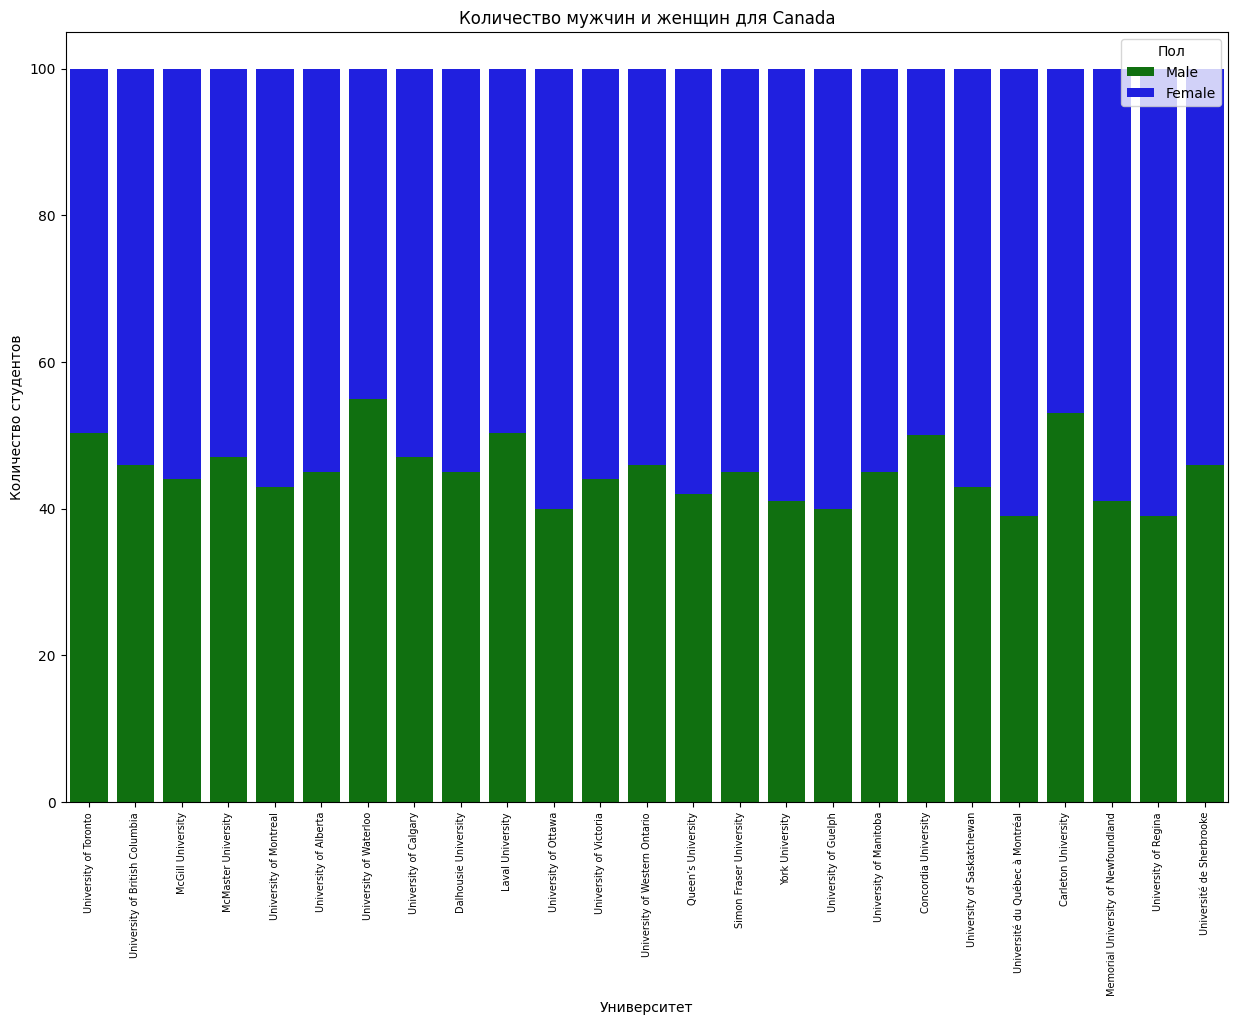

In [13]:
selected_universities = ['Canada']
df2016 = df[df.year == 2016]
selected_df = df2016[df2016['country'].isin(selected_universities)]

plt.figure(figsize=(15, 10))
sns.barplot(data=selected_df, x='university_name', y='count_male', color='g', label='Male')
sns.barplot(data=selected_df, x='university_name', y='count_female', bottom=selected_df['count_male'], color='b', label='Female')

plt.title(f'Количество мужчин и женщин для {selected_universities[0]}')
plt.xlabel('Университет')
plt.xticks(rotation=90, fontsize=7)
plt.ylabel('Количество студентов')
plt.legend(title='Пол')
plt.show()

### График ниже отражает поведение значений интерующих полей для топ 10 университетов за 2016 год. Заметно, что сильной зависимости между местом университета и интересующими зачениями полей нет. 

C:\Users\Ксения\AppData\Local\Temp\ipykernel_30360\1537942511.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top10['international'] = top10['international'].astype(float)
C:\Users\Ксения\AppData\Local\Temp\ipykernel_30360\1537942511.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top10['income'] = top10['income'].replace('-',0.0).astype(float)


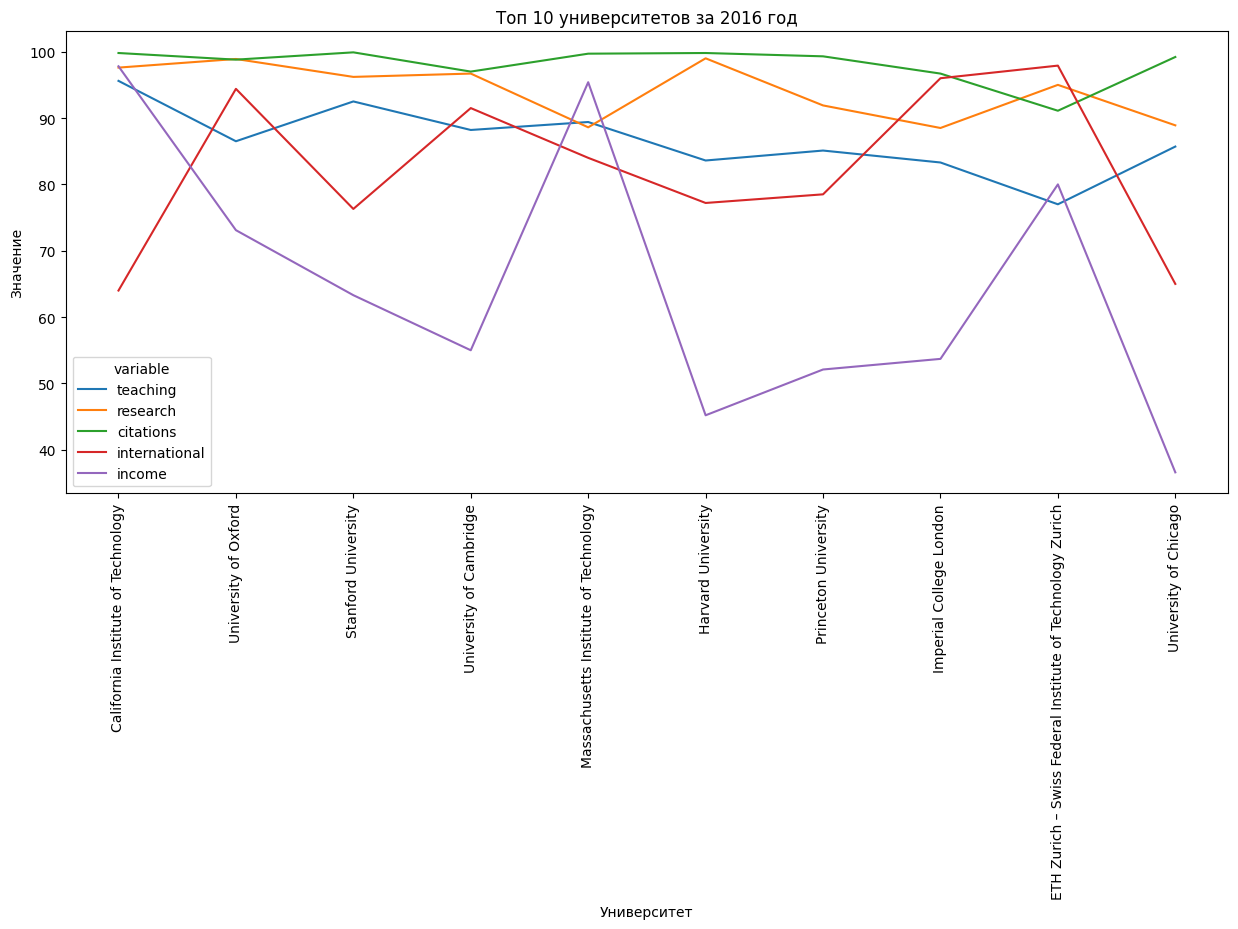

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

top10 = df2016.head(10)

top10['international'] = top10['international'].astype(float)
top10['income'] = top10['income'].replace('-',0.0).astype(float)

# Преобразуем данные в длинный формат
top10_melt = pd.melt(top10, id_vars='university_name', value_vars=['teaching','research','citations','international','income'])

plt.figure(figsize=(15,6))
sns.lineplot(data=top10_melt, x='university_name', y='value', hue='variable')
plt.title('Топ 10 университетов за 2016 год')
plt.ylabel('Значение')
plt.xlabel('Университет')
plt.xticks(rotation=90)
plt.show()


### График распределения количества мужчин и женщин. Очевидно, что он выглядит следующим образом, так как пропущенные значения заменялись соотношением 50 на 50, что усредняет результат среднего значения за какой-то год. А также в целом количество мужчин и женщин в университетах примерно одинаковое.

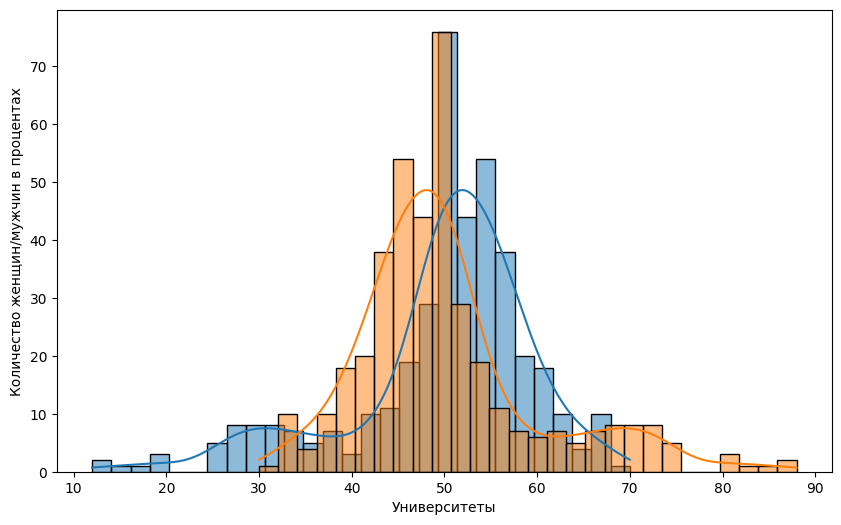

In [15]:
df2012 = df[df.year == 2012]

plt.figure(figsize=(10, 6))
sns.histplot(data=df2012, x='count_female', kde=True, label='female')
sns.histplot(data=df2012, x='count_male', kde=True, label='male')
plt.xlabel('Университеты')
plt.ylabel('Количество женщин/мужчин в процентах')
plt.show()

### На графике ниже получается среднее значение количества женщин в процентах по странам за все года. Больше всего женщин в Qatar. Однако неверно так решать задачу, необходимо сделать выборку по унверситетам, которые есть для всех годов, а далее сравнивать среднее количество, но мне лень 

       country  count_female
48       Qatar     74.000000
4      Belarus     69.000000
11      Cyprus     69.000000
32      Latvia     68.000000
23     Iceland     66.000000
..         ...           ...
62      Taiwan     38.099719
26        Iran     35.538462
29       Japan     34.655712
3   Bangladesh     34.000000
24       India     24.245599

[72 rows x 2 columns]


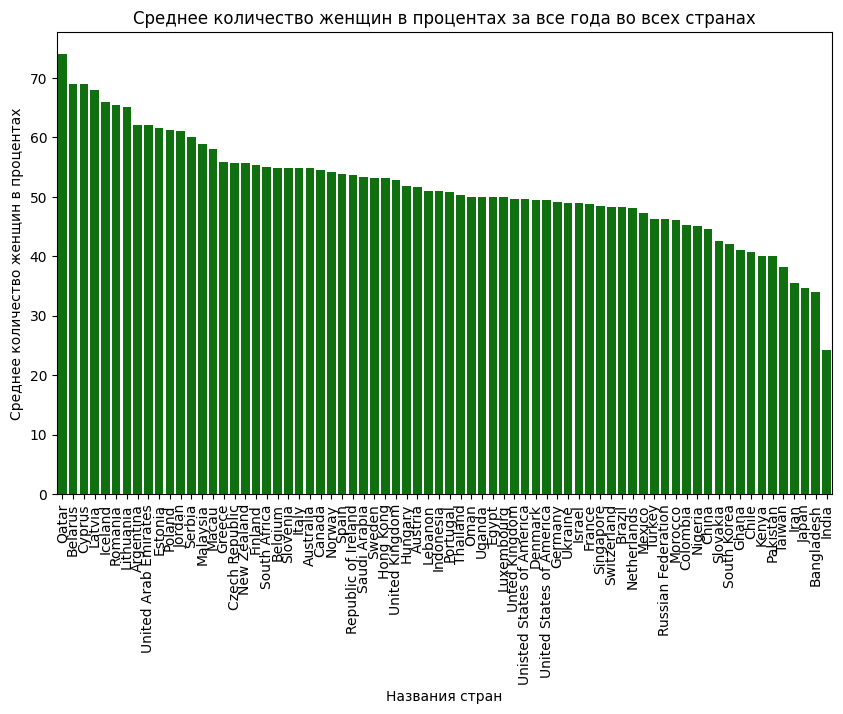

In [16]:
df2011 = df[df.year == 2011]
df2012 = df[df.year == 2012]
df2013 = df[df.year == 2013]
df2014 = df[df.year == 2014]
df2015 = df[df.year == 2015]
df2016 = df[df.year == 2016]

df_all_years = [df2011, df2012, df2013, df2014, df2015, df2016]

df_all = pd.concat(df_all_years) 
female_all = df_all.groupby('country')['count_female'].mean().reset_index().sort_values(by='count_female', ascending=False)
print(female_all)

plt.figure(figsize=(10, 6))
sns.barplot(data=female_all, x='country', y='count_female', color='g')
plt.title('Среднее количество женщин в процентах за все года во всех странах')
plt.xlabel('Названия стран')
plt.ylabel('Среднее количество женщин в процентах')
plt.xticks(rotation=90)
plt.show()

### Топ 5 стран за все года с наибольшим количеством университетов. На графике ниже scatterplot отражает зависимость кол-ва цитирований от кол-ва студентов. Явной зависимости нет. В Америке среднее кол-во студентов около 24000 и наибольшее количество цитирований.

In [17]:
top_countries = df_all['country'].value_counts().index[:5]
df_top_countries = df_all[df_all['country'].isin(top_countries)]

country_stats = df_top_countries.groupby(['country']).mean().reset_index()
print(country_stats)

                    country   teaching   research  citations  num_students  \
0                 Australia  31.852137  36.118803  55.988889  26342.085470   
1                    Canada  39.007407  42.267593  60.687963  31218.287037   
2                   Germany  39.303289  33.750658  66.437500  27826.674456   
3            United Kingdom  37.170667  37.417333  66.715000  17534.418737   
4  United States of America  47.944310  45.152200  74.811533  24039.213648   

   student_staff_ratio         year  count_female  count_male  
0            27.294017  2014.000000     54.746735   45.253265  
1            22.067593  2013.870370     54.442962   45.557038  
2            38.455859  2013.940789     49.088631   50.911369  
3            16.139113  2013.866667     52.881919   47.118081  
4            13.777298  2013.767830     49.504970   50.495030  


C:\Users\Ксения\AppData\Local\Temp\ipykernel_30360\758952267.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  country_stats = df_top_countries.groupby(['country']).mean().reset_index()


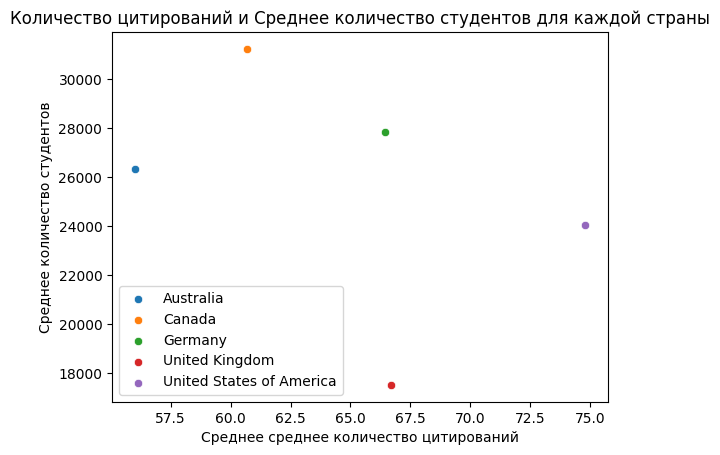

In [56]:
for country in country_stats['country'].unique():
    country_data = country_stats[country_stats['country'] == country]
    sns.scatterplot(data=country_data, x='citations', y='num_students', label=country)
    
plt.title('Количество цитирований и Среднее количество студентов для каждой страны')
plt.xlabel('Среднее среднее количество цитирований')
plt.ylabel('Среднее количество студентов')
plt.show()

In [19]:
df2011 = df[df.year == 2011]
df2012 = df[df.year == 2012]
df2013 = df[df.year == 2013]
df2014 = df[df.year == 2014]
df2015 = df[df.year == 2015]
df2016 = df[df.year == 2016]

### На графиках ниже можно посмотреть топ 10 университетов за все года с наибольшим количеством университетов. С помощью этого графика можно посмотреть как изменялось количество университетов для разных стран. Наибольшее кол-во было в 2016 году у США - 146 университетов.

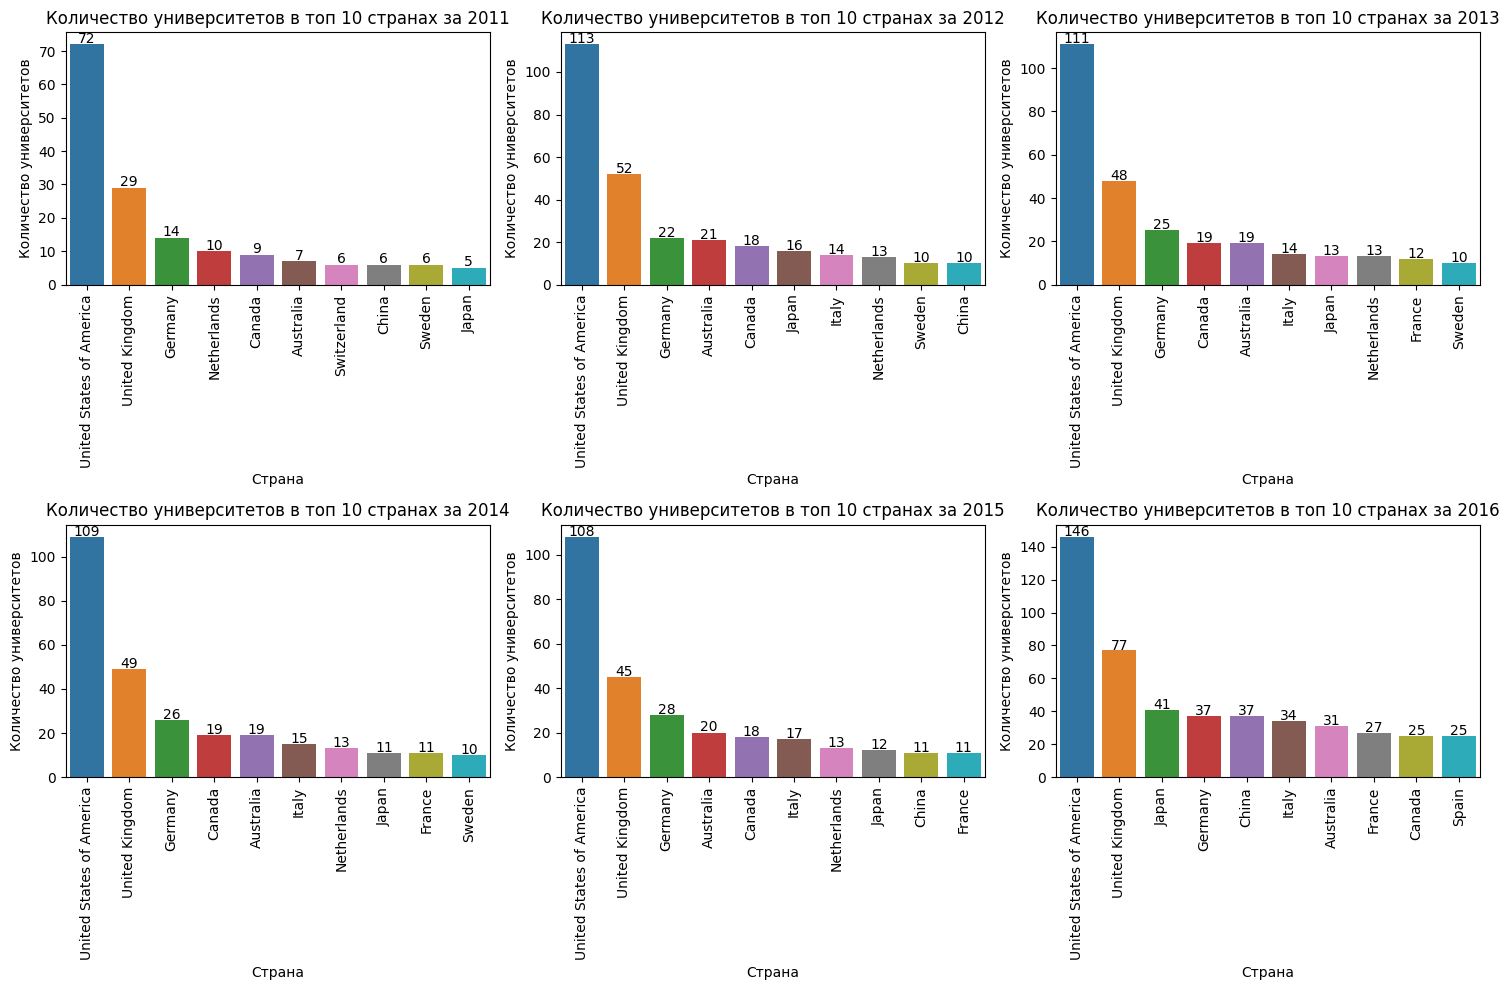

In [20]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.ravel()
df_years = [df2011, df2012, df2013, df2014, df2015, df2016]
years = [2011, 2012, 2013, 2014, 2015, 2016]

for i, df_year in enumerate(df_years):
    
    top_countries = df_year['country'].value_counts().index[:10]
    df_top_countries = df_year[df_year['country'].isin(top_countries)]

   
    country_counts = df_top_countries['country'].value_counts().reset_index()
    country_counts.columns = ['country', 'count']

    sns.barplot(data=country_counts, x='country', y='count', ax=axs[i])
    axs[i].set_title(f'Количество университетов в топ 10 странах за {years[i]}')
    axs[i].set_xlabel('Страна')
    axs[i].set_ylabel('Количество университетов')
    axs[i].tick_params(axis='x', rotation=90)

    for j, v in enumerate(country_counts['count']):
        axs[i].text(j, v + 0.5, str(v), color='black', ha='center')

plt.tight_layout()
plt.show()


# ВЫБОРКИ

### Случайная выборка

In [47]:
df.sample(100)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year,count_female,count_male
25,26,University of Tokyo,Japan,87.7,18.4,91.9,58.1,-,75.6,26199.0,5.7,10,NaN,2011,49.683988,50.316012
1730,301-350,University of Connecticut,United States of America,37.6,38.8,27.1,45.4,31.1,-,25742.0,13.0,11,51 : 49,2015,51.000000,49.000000
1083,80,Tufts University,United States of America,46.7,43.4,32.1,93.9,39.1,56.1,10410.0,10.0,14,54 : 46,2014,54.000000,46.000000
41,42,École Normale Supérieure,France,66.8,44.9,48.2,95.7,30.7,68.6,2400.0,7.9,20,46 : 54,2011,46.000000,54.000000
1237,226-250,Tilburg University,Netherlands,32.0,57.6,45.7,39.0,55.5,-,7576.0,22.4,10,49 : 51,2014,49.000000,51.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,=138,Chinese University of Hong Kong,Hong Kong,41.5,81.1,48.5,68.4,37.5,54.5,17916.0,10.2,22,53 : 47,2016,53.000000,47.000000
1085,83,University of Amsterdam,Netherlands,38.3,58.3,54.1,75.0,50.2,55.9,24570.0,14.4,11,53 : 47,2014,53.000000,47.000000
1207,201-225,Istanbul Technical University,Turkey,26.2,35.7,19.2,82.3,68.2,-,34550.0,16.0,5,34 : 66,2014,34.000000,66.000000
1152,150,University of Copenhagen,Denmark,33.9,76.0,32.0,73.1,43.0,48.5,27545.0,4.1,19,67 : 33,2014,67.000000,33.000000


### Выборка каждого 5-го

In [48]:
df.iloc[::5]

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year,count_female,count_male
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,20152.0,8.9,25,NaN,2011,49.683988,50.316012
5,6,University of Cambridge,United Kingdom,90.5,77.7,94.1,94.0,57.0,91.2,18812.0,11.8,34,46 : 54,2011,46.000000,54.000000
10,11,"University of California, Los Angeles",United States of America,83.0,48.1,92.9,93.2,-,87.7,38206.0,10.3,15,52 : 48,2011,52.000000,48.000000
15,15,University of Michigan,United States of America,83.9,53.3,89.1,84.1,59.6,83.4,41786.0,9.0,16,48 : 52,2011,48.000000,52.000000
20,21,University of Hong Kong,Hong Kong,68.4,91.4,71.4,96.1,56.5,79.2,19835.0,17.6,38,53 : 47,2011,53.000000,47.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2580,601-800,Tomsk State University,Russian Federation,34.8,36.9,20.8,7.6,44.0,-,10413.0,9.9,12,60 : 40,2016,60.000000,40.000000
2585,601-800,Universiti Sains Malaysia,Malaysia,26.9,44.2,16.6,12.4,34.4,-,28179.0,14.8,10,61 : 39,2016,61.000000,39.000000
2590,601-800,Vilnius University,Lithuania,18.3,40.8,13.6,26.1,41.0,-,19019.0,14.2,4,65 : 35,2016,65.000000,35.000000
2595,601-800,West University of Timişoara,Romania,16.1,21.0,3.9,22.4,-,-,12933.0,19.0,3,62 : 38,2016,62.000000,38.000000


### Конкретная выборка по общему значению оценки большей 70.

In [51]:
df['total_score'].replace('-', 0.0).astype(float)
df['total_score'] = pd.to_numeric(df['total_score'], errors='coerce')

df[df['total_score'] > 70]


,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year,count_female,count_male
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,20152.0,8.9,25,NaN,2011,49.683988,50.316012
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,2243.0,6.9,27,33 : 67,2011,33.000000,67.000000
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,11074.0,9.0,33,37 : 63,2011,37.000000,63.000000
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,15596.0,7.8,22,42 : 58,2011,42.000000,58.000000
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,7929.0,8.4,27,45 : 55,2011,45.000000,55.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1844,42,Peking University,China,77.8,49.2,72.4,69.1,100.0,72.0,40148.0,8.3,14,NaN,2016,49.683988,50.316012
1845,43,University of Tokyo,Japan,81.4,30.3,83.0,60.9,50.8,71.1,26199.0,5.7,10,NaN,2016,49.683988,50.316012
1846,=44,"University of California, Davis",United States of America,60.1,58.4,72.7,84.3,57.3,71.0,35364.0,13.9,13,54 : 46,2016,54.000000,46.000000
1847,=44,University of Hong Kong,Hong Kong,64.6,99.5,72.8,70.1,53.7,71.0,19835.0,17.6,38,53 : 47,2016,53.000000,47.000000


### Также во время работы с графиками производилась выборка университетов по годам.